# stereo assignmnet
* stereo vision
* block matching
* Dynamic programming

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img1 = cv.imread("images/l1.png", 0)
img2 = cv.imread("images/r1.png", 0)

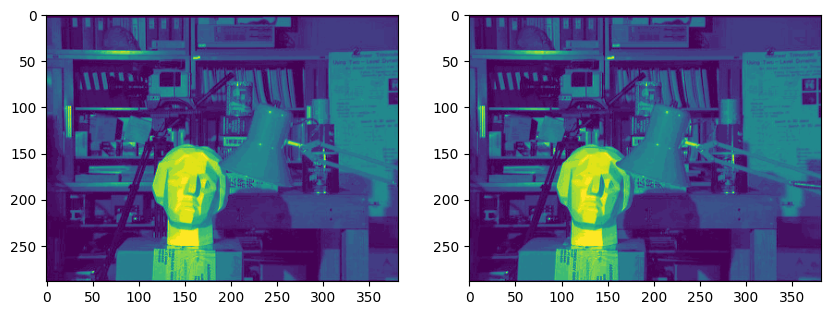

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img1)
ax[1].imshow(img2)


In [ ]:
# SSD (Sum of Squared Differences) function Lambda
SSD = lambda window1, window2: np.sum((window1 - window2) ** 2)
SAD = lambda window1, window2: np.sum(np.abs(window1 - window2))


In [36]:
# Implementing stere block matching from scratch
def block_matching(img1, img2, window_size=3, max_disparity=16, flag=0):
    # Get the shape of the image
    height, width = img1.shape
    # Define the disparity map
    disparity_map = np.zeros((height, width), np.uint8)
    # Define the half window
    half_window = window_size // 2
    # Loop through every pixel in the left image
    for y in range(half_window, height - half_window):
        for x in range(half_window, width - half_window):
            # Get the current window
            window = img1[y - half_window: y + half_window + 1, x - half_window: x + half_window + 1]
            # Define the minimum SSD
            min_ssd = 255 * window_size * window_size
            # Define the best disparity
            best_disparity = 0
            # Loop through every possible disparity
            for d in range(max_disparity):
                # Check if we are within the image bounds
                if x - d - half_window >= 0:
                    # Get the current window from the right image
                    current_window = img2[y - half_window: y + half_window + 1, x - d - half_window: x - d + half_window + 1]
                    # Calculate the SSD
                    ssd = np.sum((window.astype("float") - current_window.astype("float")) ** 2)
                    # Calculate the SAD
                    # sad = np.sum(np.abs(window.astype("float") - current_window.astype("float")))
                    # Check if the SSD is less than the minimum SSD
                    if ssd < min_ssd:
                        # Update the minimum SSD
                        min_ssd = ssd
                        # Update the best disparity
                        best_disparity = d
            # Update the disparity map
            disparity_map[y, x] = best_disparity
    return disparity_map

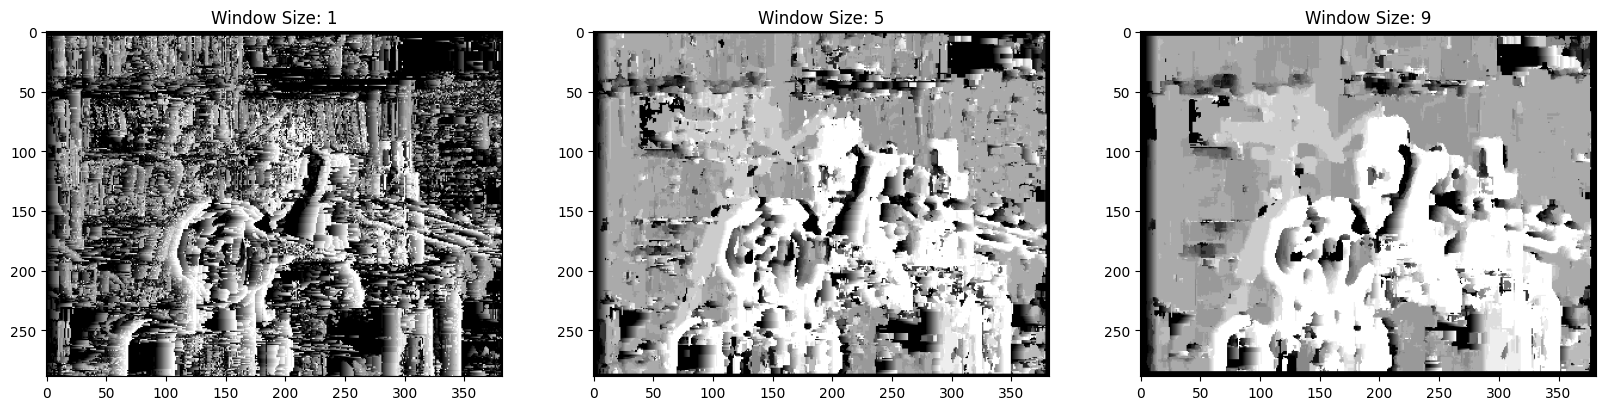

In [37]:
win_size = [1, 5, 9]

fig , ax = plt.subplots(1, 3, figsize=(20, 20))
for win in win_size:
    disparity_map = block_matching(img1, img2, window_size=win)
    ax[win_size.index(win)].imshow(disparity_map, cmap="gray")
    ax[win_size.index(win)].set_title("Window Size: {}".format(win))


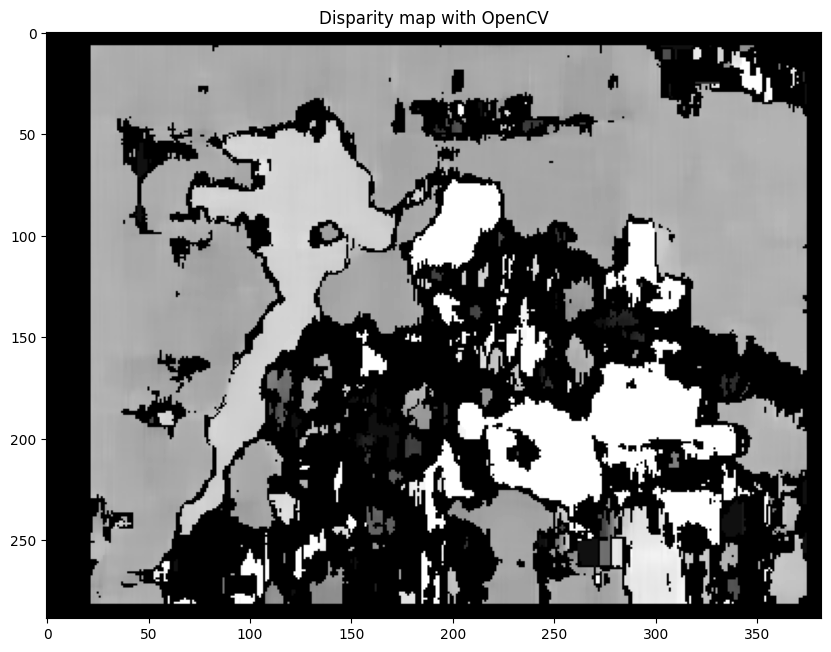

In [41]:
# Implementing stere block matching using OpenCV
stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
disparity_map = stereo.compute(img1, img2)
plt.figure(figsize=(10, 10))
plt.imshow(disparity_map, cmap="gray")
plt.title("Disparity map with OpenCV")
plt.show()
